In [1]:
import numpy as np
import pandas as pd 
import re

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path1 = "drive/My Drive/GEN-sarc-notsarc.csv"
path2 = "drive/My Drive/HYP-sarc-notsarc.csv"
path3 = "drive/My Drive/RQ-sarc-notsarcc.csv"
df1 = pd.read_csv(path1, encoding='ISO-8859-1')
df2 = pd.read_csv(path1, encoding='ISO-8859-1')
df3 = pd.read_csv(path1, encoding='ISO-8859-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1.head()

,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...


In [4]:
df2.head()

,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...


In [5]:
df3.head()

,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...


In [6]:
df = pd.concat([df1, df2, df3], ignore_index=True)
print(df1.count())
print(df2.count())
print(df3.count())


print(df.count())
df.head()

class    6520
id       6520
text     6520
dtype: int64
class    6520
id       6520
text     6520
dtype: int64
class    6520
id       6520
text     6520
dtype: int64
class    19560
id       19560
text     19560
dtype: int64


,class,id,text
0,notsarc,1,"If that's true, then Freedom of Speech is doom..."
1,notsarc,2,Neener neener - is it time to go in from the p...
2,notsarc,3,"Just like the plastic gun fear, the armour pie..."
3,notsarc,4,So geology is a religion because we weren't he...
4,notsarc,5,Well done Monty. Mark that up as your first ev...


In [7]:
df = df.dropna()
df = df.drop_duplicates()
df.count()

class    6520
id       6520
text     6520
dtype: int64

In [8]:
 df['label'] = df['class'].replace({ "notsarc": 0, "sarc":1})
df.head()


,class,id,text,label
0,notsarc,1,"If that's true, then Freedom of Speech is doom...",0
1,notsarc,2,Neener neener - is it time to go in from the p...,0
2,notsarc,3,"Just like the plastic gun fear, the armour pie...",0
3,notsarc,4,So geology is a religion because we weren't he...,0
4,notsarc,5,Well done Monty. Mark that up as your first ev...,0


In [9]:
df.drop(['class', 'id'], axis='columns', inplace=True)
df.head()

,text,label
0,"If that's true, then Freedom of Speech is doom...",0
1,Neener neener - is it time to go in from the p...,0
2,"Just like the plastic gun fear, the armour pie...",0
3,So geology is a religion because we weren't he...,0
4,Well done Monty. Mark that up as your first ev...,0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, stratify=df['label'])

train_imbalanced = df
from sklearn.utils import resample
df_majority = df[df.label==0]
df_minority = df[df.label==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print("Before")
print(df.label.value_counts())
print("After")
print(df_upsampled.label.value_counts())

X_train, X_test, y_train, y_test = train_test_split(df_upsampled['text'], df_upsampled['label'], test_size=0.3, stratify=df_upsampled['label'])

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = TfidfVectorizer()
tf_train=vect.fit_transform(X_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(X_test)  #get same encodings on test data as of vocabulary built

Before
1    3260
0    3260
Name: label, dtype: int64
After
1    3260
0    3260
Name: label, dtype: int64


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
recall_arr = []
accuracy_arr = []
f1_arr = []

RF = RandomForestClassifier(n_estimators=10)
RF.fit(X=tf_train,y=y_train)

expected = y_test
predicted = RF.predict(tf_test)

print("Random Forest:")
print(metrics.classification_report(expected, predicted))
recall_arr.append(metrics.recall_score(expected, predicted))
accuracy_arr.append(metrics.accuracy_score(expected, predicted))
f1_arr.append(metrics.f1_score(expected, predicted))

Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       978
           1       0.78      0.74      0.76       978

    accuracy                           0.76      1956
   macro avg       0.76      0.76      0.76      1956
weighted avg       0.76      0.76      0.76      1956



Confusion Matrix:


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa2dd3c31d0>)

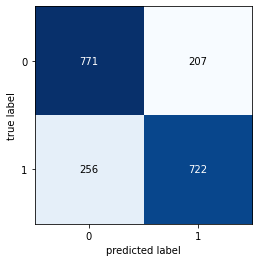

In [12]:
print("Confusion Matrix:")
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))